In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [3]:
df=pd.read_csv('D:/temp/sml/Project/dataset/application_data.csv')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.size

37516342

In [6]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:

df.drop(["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","FLAG_MOBIL",
         "FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT",
         "REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","NAME_TYPE_SUITE",
         "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"],axis=1,inplace=True)

In [8]:
df.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [9]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
307506,456251,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Sales staff,THURSDAY,...,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898
307507,456252,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,NaN,MONDAY,...,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,0.0214
307508,456253,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Managers,THURSDAY,...,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,0.7970
307509,456254,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Laborers,WEDNESDAY,...,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,0.0086
307510,456255,0,Cash loans,157500.0,675000.0,49117.5,675000.0,Commercial associate,Laborers,THURSDAY,...,0.08,0.0690,0.3750,NaN,NaN,NaN,0.0805,NaN,0.0000,0.0718


In [10]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BE

In [11]:
df.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG','NAME_CONTRACT_TYPE',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE','WEEKDAY_APPR_PROCESS_START',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI','OCCUPATION_TYPE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'],axis=1,inplace=True)

In [12]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SK_ID_CURR               307511 non-null  int64  
 1   TARGET                   307511 non-null  int64  
 2   AMT_INCOME_TOTAL         307511 non-null  float64
 3   AMT_CREDIT               307511 non-null  float64
 4   AMT_ANNUITY              307499 non-null  float64
 5   AMT_GOODS_PRICE          307233 non-null  float64
 6   NAME_INCOME_TYPE         307511 non-null  object 
 7   HOUR_APPR_PROCESS_START  307511 non-null  int64  
 8   ORGANIZATION_TYPE        307511 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 21.1+ MB


In [14]:
df.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000
mean,278180.518577,0.080729,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,12.063419
std,102790.175348,0.272419,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,3.265832
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,12.000000
75%,367142.500000,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,14.000000
max,456255.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


In [15]:
def missing (df1):
    missing_number = df1.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [16]:
df.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
AMT_INCOME_TOTAL             0
AMT_CREDIT                   0
AMT_ANNUITY                 12
AMT_GOODS_PRICE            278
NAME_INCOME_TYPE             0
HOUR_APPR_PROCESS_START      0
ORGANIZATION_TYPE            0
dtype: int64

In [17]:
#fill null values with mean,median ,mode
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [18]:
df.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0           100002       1          202500.0    406597.5      24700.5   
1           100003       0          270000.0   1293502.5      35698.5   
2           100004       0           67500.0    135000.0       6750.0   
3           100006       0          135000.0    312682.5      29686.5   
4           100007       0          121500.0    513000.0      21865.5   
...            ...     ...               ...         ...          ...   
307506      456251       0          157500.0    254700.0      27558.0   
307507      456252       0           72000.0    269550.0      12001.5   
307508      456253       0          153000.0    677664.0      29979.0   
307509      456254       1          171000.0    370107.0      20205.0   
307510      456255       0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE  HOUR_APPR_PROCESS_START  \
0              

In [19]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
NAME_INCOME_TYPE           0
HOUR_APPR_PROCESS_START    0
ORGANIZATION_TYPE          0
dtype: int64

In [20]:
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,202500.0,406597.5,24700.5,351000.0,Working,10,Business Entity Type 3
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,State servant,11,School
2,100004,0,67500.0,135000.0,6750.0,135000.0,Working,9,Government
3,100006,0,135000.0,312682.5,29686.5,297000.0,Working,17,Business Entity Type 3
4,100007,0,121500.0,513000.0,21865.5,513000.0,Working,11,Religion


In [21]:
 # finding numerical data and categorical data in dataset
numerical= df.drop(['TARGET'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START'],
      dtype='object')


Categorical Columns: Index(['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE'], dtype='object')


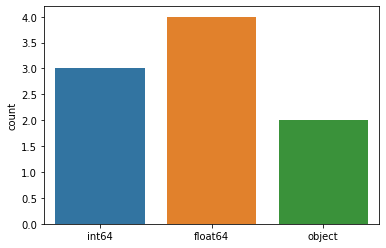

In [22]:
sns.countplot(x = df.dtypes.map(str))
plt.show()

In [23]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['NAME_INCOME_TYPE']= label_encoder.fit_transform(df['NAME_INCOME_TYPE'])

df['NAME_INCOME_TYPE']

0         7
1         4
2         7
3         7
4         7
         ..
307506    7
307507    3
307508    7
307509    1
307510    1
Name: NAME_INCOME_TYPE, Length: 307511, dtype: int32

In [24]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['ORGANIZATION_TYPE']= label_encoder.fit_transform(df['ORGANIZATION_TYPE'])

df['ORGANIZATION_TYPE']

0          5
1         39
2         11
3          5
4         37
          ..
307506    43
307507    57
307508    39
307509     3
307510     5
Name: ORGANIZATION_TYPE, Length: 307511, dtype: int32

In [25]:
for col in df.columns:
    if df[col].dtypes != object:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('mean:',df[col].mean())
        print('mode:',df[col].mode()[0])
        print('median:',df[col].median())
        print('skewness:',df[col].skew())
        print('kurtosis:',df[col].kurtosis())
        print('null_value count:',df[col].isnull().sum())
        print('\n')

column name SK_ID_CURR
mean: 278180.51857657125
mode: 100002
median: 278202.0
skewness: -0.0012002350768207104
kurtosis: -1.1989877778996432
null_value count: 0


column name TARGET
mean: 0.08072881945686496
mode: 0
median: 0.0
skewness: 3.0781586659196685
kurtosis: 7.475109389392569
null_value count: 0


column name AMT_INCOME_TOTAL
mean: 168797.9192969845
mode: 135000.0
median: 147150.0
skewness: 391.5596541041876
kurtosis: 191786.55438080415
null_value count: 0


column name AMT_CREDIT
mean: 599025.9997057016
mode: 450000.0
median: 513531.0
skewness: 1.2347784971349398
kurtosis: 1.9340413008324937
null_value count: 0


column name AMT_ANNUITY
mean: 27108.48784108536
mode: 9000.0
median: 24903.0
skewness: 1.5798237246955467
kurtosis: 7.7077559537369025
null_value count: 0


column name AMT_GOODS_PRICE
mean: 538316.2943667056
mode: 450000.0
median: 450000.0
skewness: 1.350142549635089
kurtosis: 2.4374401731304225
null_value count: 0


column name NAME_INCOME_TYPE
mean: 4.6702882173320

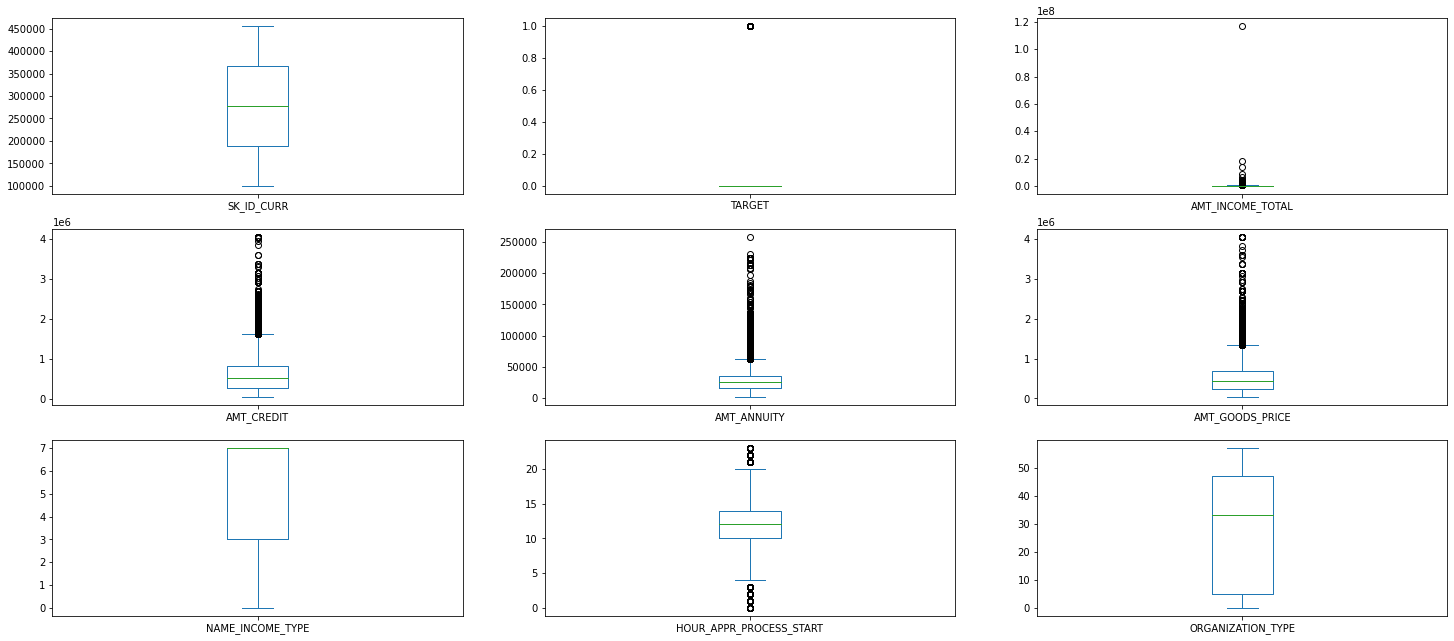

In [26]:
#checking outliers
#Outlier Search: This helps you to get some insights about the outliers in the data.
df.plot(kind='box', layout=(3,3), figsize=(25,11), subplots=True)
plt.show()

In [27]:
def out_to_null(data=df):
    for x in df.columns:
        if df[x].dtypes ==np.float64:
            #In the given column the outliers will convert into null values
            print('\n\n Column name:', x)
            q1=data[x].quantile(0.25)
            print('Quatile, Q1: ',q1)
            q3=data[x].quantile(0.75)
            print('Quatile, Q3: ',q3)
            iqr=q3-q1
            print('Inter Quatile Range, IQR: ',iqr)
            ulp=q3+(1.5*iqr)
            print('Upper Limit Point, ULP: ',ulp)
            llp=q1-(1.5*iqr)
            print('Lower Limit Point, LLP: ',llp)
            #here the values which are above upperlimit and below lowerlimt are replaced with null values          
            data[x]=np.where(data[x] > ulp,np.nan,
                                   np.where(data[x] < llp,np.nan ,data[x]))
            print('\n\nin the given column the outliers are replaced with null values\n')

C:\Users\lmakkapa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lmakkapa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lmakkapa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

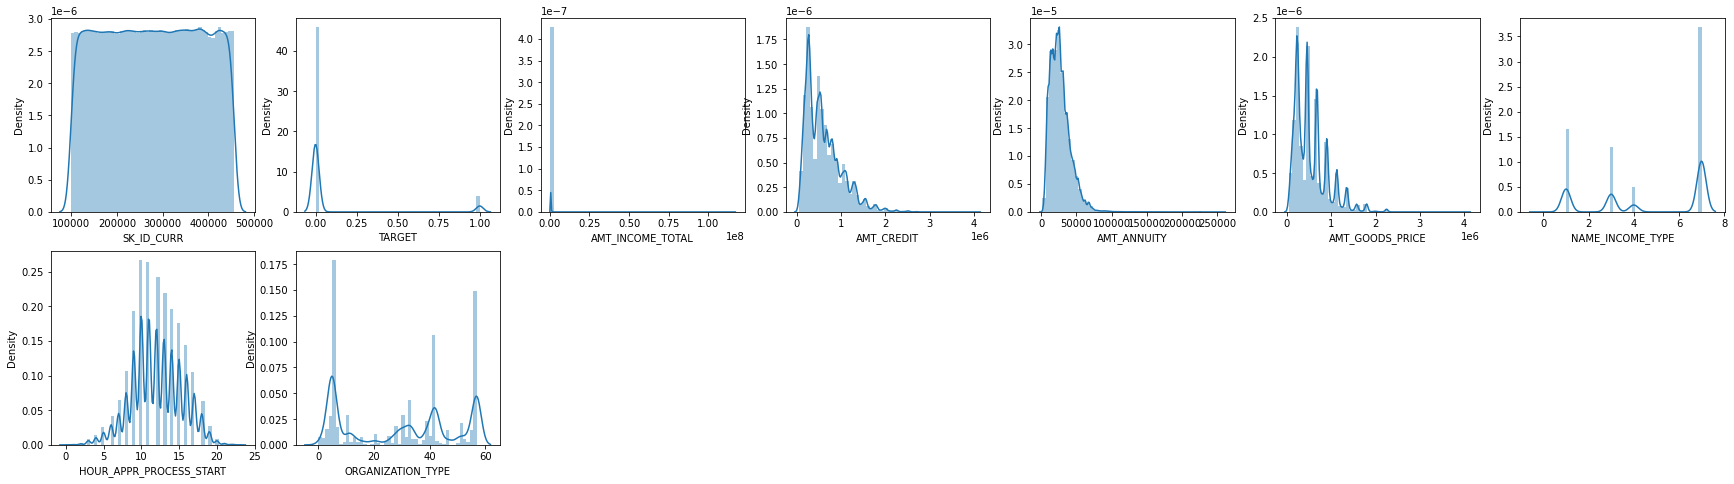

In [28]:
count=1
plt.subplots(figsize=(30,25))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(df[i])
        count+=1

plt.show()

In [29]:
cor = df.corr()
cor

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
SK_ID_CURR,1.000000,-0.002108,-0.001820,-0.000343,-0.000431,-0.000258,-0.002112,0.000350,0.002269
TARGET,-0.002108,1.000000,-0.003982,-0.030369,-0.012815,-0.039623,0.046829,-0.024166,-0.030765
AMT_INCOME_TOTAL,-0.001820,-0.003982,1.000000,0.156870,0.191657,0.159632,-0.044451,0.036459,-0.058272
AMT_CREDIT,-0.000343,-0.030369,0.156870,1.000000,0.770127,0.986734,-0.071794,0.052738,-0.052620
AMT_ANNUITY,-0.000431,-0.012815,0.191657,0.770127,1.000000,0.774837,-0.073018,0.052265,-0.077215
AMT_GOODS_PRICE,-0.000258,-0.039623,0.159632,0.986734,0.774837,1.000000,-0.072458,0.062269,-0.052060
NAME_INCOME_TYPE,-0.002112,0.046829,-0.044451,-0.071794,-0.073018,-0.072458,1.000000,-0.029674,-0.176226
HOUR_APPR_PROCESS_START,0.000350,-0.024166,0.036459,0.052738,0.052265,0.062269,-0.029674,1.000000,-0.083595
ORGANIZATION_TYPE,0.002269,-0.030765,-0.058272,-0.052620,-0.077215,-0.052060,-0.176226,-0.083595,1.000000


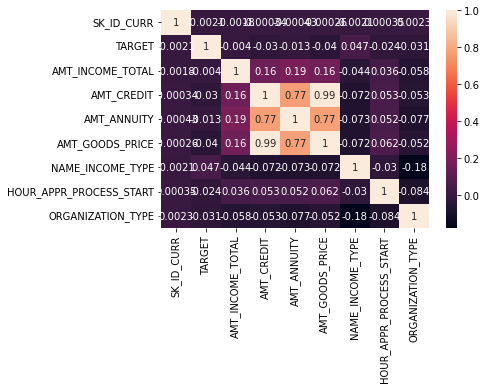

In [30]:
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
X = df.drop("TARGET",axis=1)
y = df.TARGET

In [32]:
X.shape

(307511, 8)

In [33]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

X_train.shape,X_test.shape

((215257, 8), (92254, 8))

In [34]:
X_train

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
208983,342217,202500.0,585000.0,29250.0,585000.0,4,10,11
71687,183133,112500.0,656811.0,30564.0,567000.0,3,11,57
301340,449106,144000.0,450000.0,22500.0,450000.0,1,10,4
216927,351350,450000.0,1483231.5,51687.0,1354500.0,4,18,41
109091,226525,202500.0,454500.0,19255.5,454500.0,1,9,5
...,...,...,...,...,...,...,...,...
21440,124980,292500.0,2013840.0,53253.0,1800000.0,7,11,55
117583,236346,157500.0,599778.0,32665.5,477000.0,7,6,11
73349,185050,135000.0,270000.0,13500.0,270000.0,1,12,5
267336,409734,135000.0,781920.0,47835.0,675000.0,7,14,40


In [35]:
X_test

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
64282,174545,135000.0,654498.0,31617.0,585000.0,3,9,57
94645,209898,135000.0,234576.0,25393.5,202500.0,7,17,11
306349,454938,112500.0,157914.0,16753.5,139500.0,7,14,33
258314,398930,247500.0,1125000.0,36292.5,1125000.0,7,16,40
87597,201672,202500.0,900000.0,35158.5,900000.0,7,8,42
...,...,...,...,...,...,...,...,...
98497,214360,81000.0,808650.0,26217.0,675000.0,7,16,40
205542,338256,99000.0,135000.0,10822.5,135000.0,7,14,42
127474,247835,157500.0,675000.0,38880.0,675000.0,7,10,42
46981,154418,112500.0,1006920.0,42790.5,900000.0,3,11,57


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(2)

In [71]:
models = []
models.append(('KNN', KNeighborsClassifier()))


In [72]:
from sklearn import model_selection

KNN: 0.914284 (0.002409)


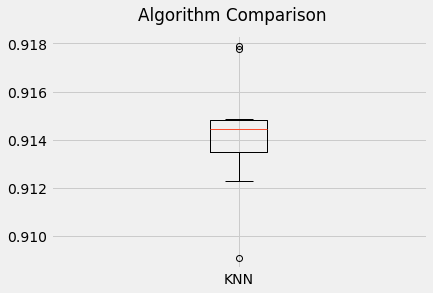

In [73]:
seed = 1
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
#second approch

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X)
X_sc = sc.transform(X)


km = KMeans(n_clusters=5, random_state=0)
km.fit(X_sc)

pred = km.predict(X_sc)
print(Counter(pred))

'''plt.scatter(X_pca[:,0], X_pca[:,1], c=pred, cmap='Paired', s=60, edgecolors='white')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            marker='*',c=[mglearn.cm2(0), mglearn.cm2(1)],s=60, linewidth=2, edgecolor='red')
plt.xlabel('feature 0'); plt.ylabel('feature 1')
plt.show()'''

pred_a = []
for i in pred:
	if i == 1:
		pred_a.append(0)
	else:
		pred_a.append(1)


# 비교
from sklearn.metrics import confusion_matrix, classification_report
print('confusion_matrix\n', confusion_matrix(y_true=y, y_pred=pred_a))
print('classification_report\n', classification_report(y_true=y, y_pred=pred_a))

# save
save_df = pd.DataFrame(X, columns=X.columns)
save_df['Class'] = y

save_df['Cluster1'] = pred_a
save_df.to_csv('creditcard_cluster1.csv', index=False)

Counter({1: 94467, 2: 72995, 0: 70585, 3: 44639, 4: 24825})
confusion_matrix
 [[ 94467 188219]
 [     0  24825]]
classification_report
               precision    recall  f1-score   support

           0       1.00      0.33      0.50    282686
           1       0.12      1.00      0.21     24825

    accuracy                           0.39    307511
   macro avg       0.56      0.67      0.35    307511
weighted avg       0.93      0.39      0.48    307511



In [67]:
#choosing number of clusters

In [56]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

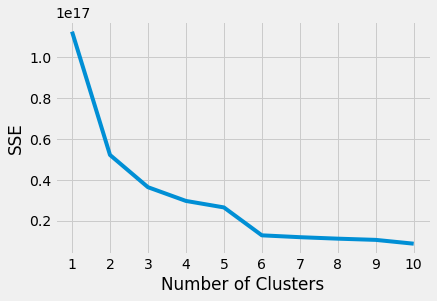

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [59]:
from kneed import KneeLocator

In [60]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [61]:
kl.elbow

3